# 练习1 引入l2范数正则项 梯度下降算法推导

### 带有L2范数正则项的线性回归模型的损失函数：
$$\text{Loss} = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 + \frac{\lambda}{2} \sum_{j=1}^{n} w_j^2$$

### 对平方损失项求导：
$$ \frac{\partial}{\partial w_j} \left( \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 \right) = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})x_j^{(i)} $$

### 对L2范数正则项求导：
$$\frac{\partial}{\partial w_j} \left(\frac{\lambda}{2} \sum_{j=1}^{n} w_j^2 \right) = \lambda \cdot w_j$$

### 损失函数导数：
$$\frac{\partial}{\partial w_j} \text{Loss} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})x_j^{(i)} + \lambda \cdot w_j$$

## 批量梯度下降算法：
$$ w_j = w_j - \alpha \left( \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})x_j^{(i)} + \lambda w_j \right) $$

# 练习2 引入l2范数正则项，观察回归效果变化

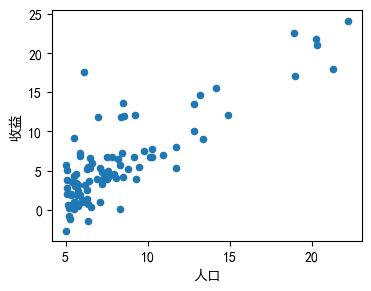

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import rcParams  # rcParams是Matplotlib中的一个字典，用于管理默认参数和属性


config = {
    "mathtext.fontset": 'stix',  # 数学公式的字体集
    "font.family": 'serif',  # 指定绘图中的字体系列为衬线字体
    "font.serif": ['SimHei'],  # 设置衬线字体的具体类型，中文宋体
    "font.size": 10,  # 字号，大家自行调节
    'axes.unicode_minus': False  # 处理负号，即-号
}
rcParams.update(config)  # 设置画图的一些参数

# 读取数据
path = 'C:/Users/Leonardo/regress_data1.csv'
data = pd.read_csv(path)  # data 是dataframe 的数据类型
data.head()  # 返回data中的前几行数据，默认是前5行。

cols = data.shape[1]
X_data1 = data.iloc[:, :cols - 1]
X_data = data.iloc[:, :cols - 1]  # X是所有行，去掉最后一列
y_data = data.iloc[:, cols - 1:]  # X是所有行，最后一列
data.describe()  # 查看数据的统计信息

data.plot(kind='scatter', x='人口', y='收益', figsize=(4, 3))  # 利用散点图可视化数据
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()
X_data.insert(0, 'Ones', 1)

X = X_data.values
Y = y_data.values
W = np.array([[0.0], [0.0]])  # 初始化W系数矩阵，w 是一个(2,1)矩阵


### 引入l2范数正则

In [144]:

def computeCost(X, Y, W, lambda_):
    m = X.shape[0]  # 获取样本数量
    Y_hat = np.dot(X, W)  # 计算预测值
    squared_error = np.sum((Y_hat - Y)**2)  # 计算平方损失项
    regularization_term = lambda_ * np.sum(W**2)  # 计算L2范数正则项
    loss = (squared_error + regularization_term) / (2 * m)  # 加和两项并计算损失
    return loss


In [145]:
def gradientDescent(X, Y, W, alpha, lambda_):
    num_train = X.shape[0]
    Y_hat = np.dot(X, W)
    dW = (X.T @ (Y_hat - Y) + lambda_ * W) / num_train  # 加上正则化项的梯度
    W += -alpha * dW
    return W


def linearRegression(X, Y, alpha, iters, lambda_):
    loss_his = []  # 初始化模型参数
    feature_dim = X.shape[1]
    W = np.zeros((feature_dim, 1))  # 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    # 重复步骤2和步骤3，直到收敛或迭代结束
    for i in range(iters):
        # step2 : 使用初始化参数预测输出并计算损失
        loss = computeCost(X, Y, W, lambda_)
        loss_his.append(loss)
        # step3: 采用梯度下降法更新参数
        W = gradientDescent(X, Y, W, alpha, lambda_)
    return loss_his, W  # 返回损失和模型参数。




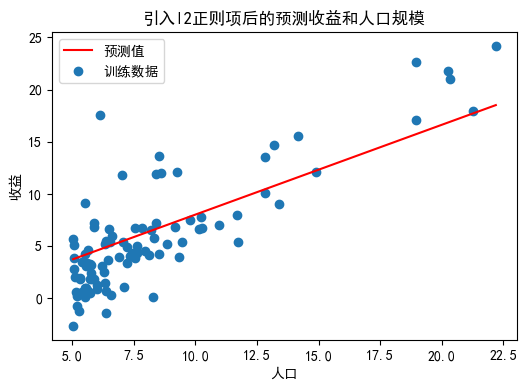

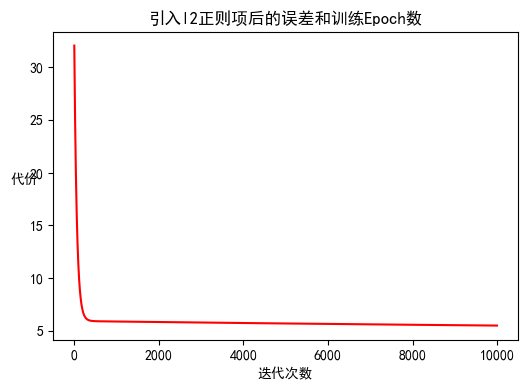

In [146]:
def predict(X, W):
    '''
    输入：
        X：测试数据集
        W：模型训练好的参数
    输出：
        y_pre：预测值
    '''
    y_pre = np.dot(X, W)
    return y_pre


alpha = 0.0001
iters = 10000
lambda_ = 0.1  # 正则化参数
loss_his, W = linearRegression(X, Y, alpha, iters, lambda_)

x = np.linspace(X_data['人口'].min(), X_data['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口')
ax.set_ylabel('收益', rotation=90)
ax.set_title('引入l2正则项后的预测收益和人口规模')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his, 'r')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('引入l2正则项后的误差和训练Epoch数')
plt.show()


## 使用最小二乘法求解线性回归模型：

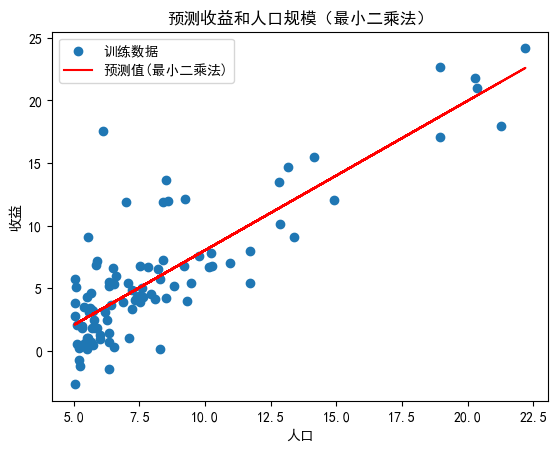

In [147]:
def leastSquaresRegression(X, Y):
    W = np.linalg.inv(X.T @ X) @ X.T @ Y
    return W

W_least_squares = leastSquaresRegression(X, Y)

# 使用最小二乘法求解得到的参数进行预测
y_pred_least_squares = predict(X, W_least_squares)

# 绘制预测结果
plt.scatter(X_data['人口'], data['收益'], label='训练数据')
plt.plot(X_data['人口'], y_pred_least_squares, 'r-', label='预测值(最小二乘法)')
plt.xlabel('人口')
plt.ylabel('收益')
plt.legend()
plt.title('预测收益和人口规模（最小二乘法）')
plt.show()


### 归一化＋l2正则

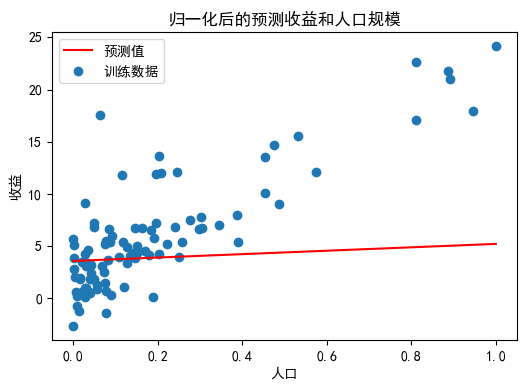

In [150]:
x_data = (X_data1-X_data1['人口'].min())/(X_data1['人口'].max()-X_data1['人口'].min())
x_data.insert(0, 'Ones', 1)
X = x_data.values
Y = y_data.values
W = np.array([[0.0], [0.0]])  # 初始化W系数矩阵

loss_his, W = linearRegression(X, Y, alpha, iters, lambda_)

x = np.linspace(x_data['人口'].min(), x_data['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(x_data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口')
ax.set_ylabel('收益', rotation=90)
ax.set_title('归一化后的预测收益和人口规模')
plt.show()

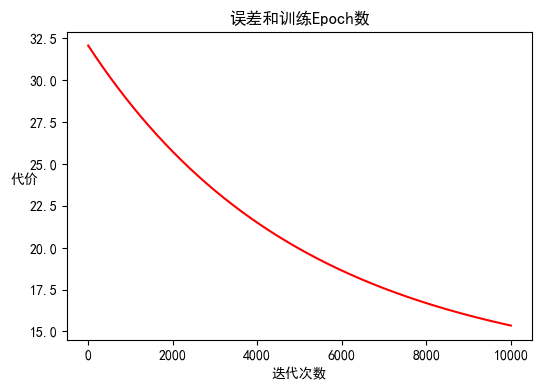

In [151]:
fig1, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his, 'r')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()
